###Loading data from OLAP database for inhouse analysis or other consumption

In [1]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.6 MB/s eta 0:00:00


In [2]:
!pip install mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 92.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp311-cp311-linux_x86_64.whl size=247949 sha256=0fbd5f0ff645a340a8ca2475e174f036dc26dc5ac1ac5aaaf1fb1a66027529ba
  Stored in directory: /root/.cache/pip/wheels/17/cd/ed/2d49e9bac69cf09382e4c7cc20a2511202b48324b87db26019
Successfully built mysql.connector


In [4]:
import mysql.connector
import pandas as pd
import numpy as np
from sqlalchemy import create_engine # object realational mapper intermediary library between python and sql
import pymysql

In [5]:
try:
  conn = mysql.connector.connect(host='olap-db.chswkseueuls.ap-south-1.rds.amazonaws.com',user='root',password='Deepankar8583',database='transformed_db')
except Exception as e:
  print(e)

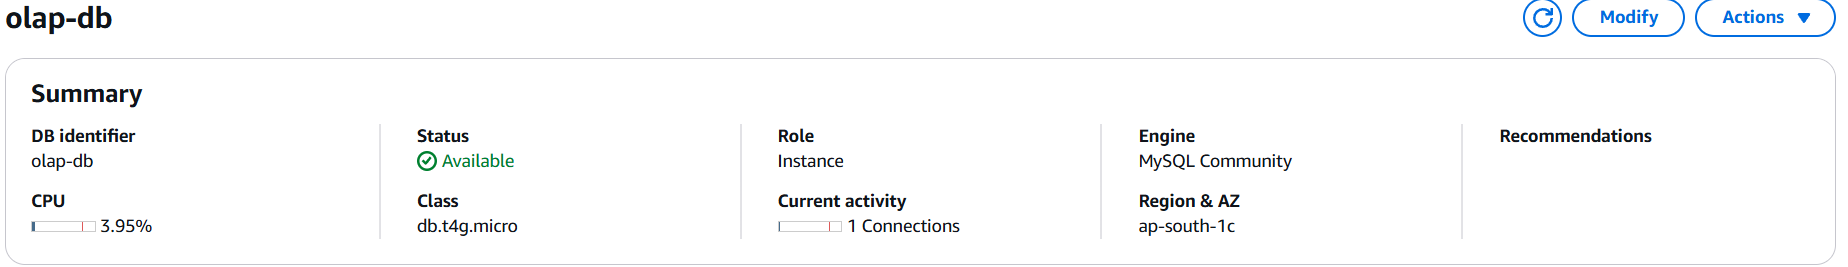

In [7]:
try :
  transformed_data = pd.read_sql_query('SELECT * FROM transformed_data',conn)
except Exception as e:
  print(e)

<ipython-input-7-6112217104dc>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transformed_data = pd.read_sql_query('SELECT * FROM transformed_data',conn)


In [8]:
transformed_data

,index,symbol,name,current_market_price,change,percent_change,volume,avg_volume,market_cap,pe_ratio,liquidty_score,earnings_yield,volatility_score,volume_acceleration
0,0,NVDA,NVIDIA Corporation,112.69,2.12,1.92,341755000.0,261527000.0,2.750000e+12,38.33,16.255,0.026,0.018813,1.306768
1,1,F,Ford Motor Company,9.90,0.29,3.02,138194000.0,78894000.0,3.923800e+10,6.78,18.556,0.147,0.029293,1.751641
2,2,PLTR,Palantir Technologies Inc.,84.90,4.44,5.52,105377000.0,97032000.0,1.991280e+11,446.86,12.271,0.002,0.052297,1.086003
3,3,WBA,"Walgreens Boots Alliance, Inc.",11.39,0.79,7.45,104361000.0,28666000.0,9.843000e+09,-1.00,36.381,-1.000,0.069359,3.640585
4,4,TSLA,"Tesla, Inc.",262.67,-0.78,-0.30,102370000.0,86215000.0,8.448830e+11,128.13,14.162,0.008,0.002970,1.187380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,351,X,United States Steel Corporation,36.23,-0.96,-2.58,5152000.0,7056000.0,8.160000e+09,23.08,7.237,0.043,0.026497,0.730159
352,352,WIT,Wipro Limited,3.26,-0.02,-0.61,3876000.0,4739000.0,3.418400e+10,23.29,8.616,0.043,0.006135,0.817894
353,353,HWM,Howmet Aerospace Inc.,124.40,-0.09,-0.07,5132000.0,2722000.0,5.038500e+10,44.27,20.178,0.023,0.000723,1.885378
354,354,BAM,Brookfield Asset Management Ltd.,48.61,-1.69,-3.36,5126000.0,1398000.0,7.888100e+10,36.55,39.956,0.027,0.034767,3.666667


In [9]:
conn.close()

####we can use this to do EDA, preprocess to train ML/DL models, make dashboards




In [10]:
transformed_data.to_csv('export.csv')